# data_preparation.R

In [1]:
# load the dataset into data frame
credit.df <- read.csv("credit_dataset_final.csv", header = TRUE, sep = ",")

## data type transformations - factoring
to.factors <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- as.factor(df[[variable]])
  }
  return(df)
}

## normalizing - scaling
scale.features <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- scale(df[[variable]], center=T, scale=T)
  }
  return(df)
}

# normalize variables
numeric.vars <- c("credit.duration.months", "age", "credit.amount")
credit.df <- scale.features(credit.df, numeric.vars)
# factor variables
categorical.vars <- c('credit.rating', 'account.balance', 'previous.credit.payment.status',
                      'credit.purpose', 'savings', 'employment.duration', 'installment.rate',
                      'marital.status', 'guarantor', 'residence.duration', 'current.assets',
                      'other.credits', 'apartment.type', 'bank.credits', 'occupation', 
                      'dependents', 'telephone', 'foreign.worker')
credit.df <- to.factors(df=credit.df, variables=categorical.vars)

# split data into training and test datasets in 60:40 ratio
indexes <- sample(1:nrow(credit.df), size=0.6*nrow(credit.df))
train.data <- credit.df[indexes,]
test.data <- credit.df[-indexes,]

# feature_selection.R

In [2]:
library(caret)  # feature selection algorithm
library(randomForest) # random forest algorithm

# rfe based feature selection algorithm
run.feature.selection <- function(num.iters=20, feature.vars, class.var){
  set.seed(10)
  variable.sizes <- 1:10
  control <- rfeControl(functions = rfFuncs, method = "cv", 
                        verbose = FALSE, returnResamp = "all", 
                        number = num.iters)
  results.rfe <- rfe(x = feature.vars, y = class.var, 
             sizes = variable.sizes, 
             rfeControl = control)
  return(results.rfe)
}

# run feature selection
rfe.results <- run.feature.selection(feature.vars=train.data[,-1], 
                                     class.var=train.data[,1])
# view results
rfe.results

Loading required package: lattice
Loading required package: ggplot2
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin




Recursive feature selection

Outer resampling method: Cross-Validated (20 fold) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         1   0.6834 0.02184    0.03637 0.04828         
         2   0.7303 0.27564    0.05806 0.16878         
         3   0.7403 0.28952    0.05012 0.14474         
         4   0.7684 0.40502    0.06504 0.16609        *
         5   0.7485 0.35042    0.07792 0.19907         
         6   0.7618 0.37509    0.06374 0.17272         
         7   0.7435 0.31077    0.06791 0.19985         
         8   0.7601 0.35047    0.07594 0.21377         
         9   0.7635 0.36533    0.06969 0.20867         
        10   0.7634 0.37329    0.07059 0.19814         
        20   0.7636 0.35194    0.06664 0.19859         

The top 4 variables (out of 4):
   account.balance, credit.duration.months, previous.credit.payment.status, savings


# rf_classifier.R

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess




Call:
 randomForest(formula = formula.init, data = train.data, importance = T,      proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 23.5%
Confusion matrix:
   0   1 class.error
0 69 110   0.6145251
1 31 390   0.0736342


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  54  31
         1  67 248
                                          
               Accuracy : 0.755           
                 95% CI : (0.7098, 0.7964)
    No Information Rate : 0.6975          
    P-Value [Acc > NIR] : 0.006392        
                                          
                  Kappa : 0.366           
 Mcnemar's Test P-Value : 0.000407        
                                          
            Sensitivity : 0.8889          
            Specificity : 0.4463          
         Pos Pred Value : 0.7873          
         Neg Pred Value : 0.6353          
             Prevalence : 0.6975          
         Detection Rate : 0.6200          
   Detection Prevalence : 0.7875          
      Balanced Accuracy : 0.6676          
                                          
       'Positive' Class : 1               
                                          

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  67  44
         1  54 235
                                          
               Accuracy : 0.755           
                 95% CI : (0.7098, 0.7964)
    No Information Rate : 0.6975          
    P-Value [Acc > NIR] : 0.006392        
                                          
                  Kappa : 0.4055          
 Mcnemar's Test P-Value : 0.363278        
                                          
            Sensitivity : 0.8423          
            Specificity : 0.5537          
         Pos Pred Value : 0.8131          
         Neg Pred Value : 0.6036          
             Prevalence : 0.6975          
         Detection Rate : 0.5875          
   Detection Prevalence : 0.7225          
      Balanced Accuracy : 0.6980          
                                          
       'Positive' Class : 1               
                                          


Parameter tuning of ‘randomForest’:

- sampling method: 10-fold cross validation 

- best parameters:
 nodesize mtry ntree
        3    3   500

- best performance: 0.24 



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  68  50
         1  53 229
                                          
               Accuracy : 0.7425          
                 95% CI : (0.6967, 0.7847)
    No Information Rate : 0.6975          
    P-Value [Acc > NIR] : 0.02707         
                                          
                  Kappa : 0.3855          
 Mcnemar's Test P-Value : 0.84378         
                                          
            Sensitivity : 0.8208          
            Specificity : 0.5620          
         Pos Pred Value : 0.8121          
         Neg Pred Value : 0.5763          
             Prevalence : 0.6975          
         Detection Rate : 0.5725          
   Detection Prevalence : 0.7050          
      Balanced Accuracy : 0.6914          
                                          
       'Positive' Class : 1               
                                          

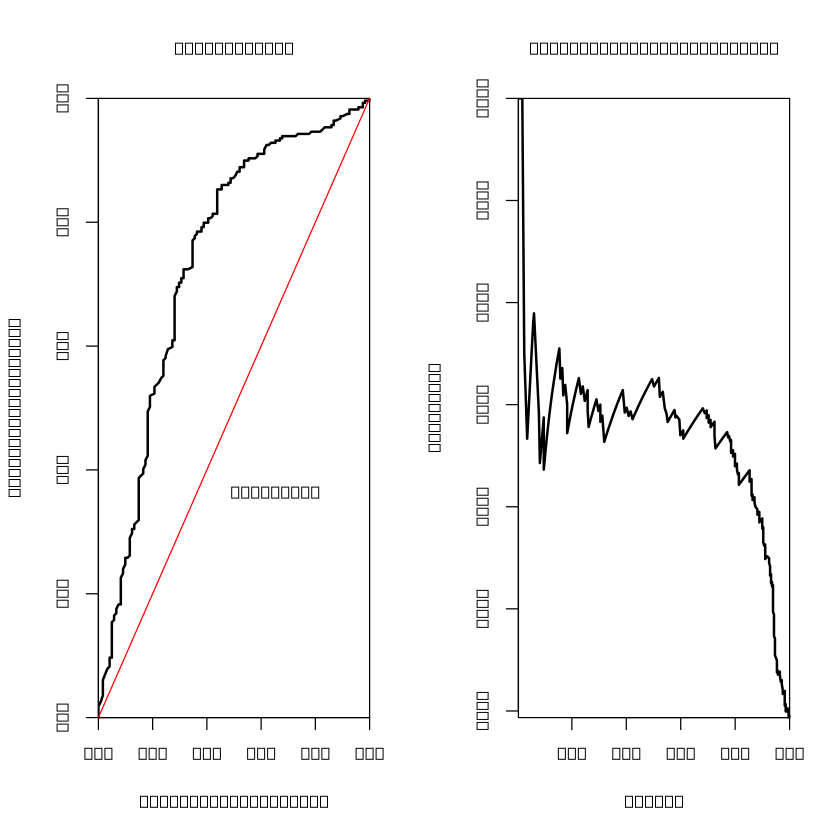

In [4]:
library(randomForest) #rf model
library(caret) # feature selection
library(e1071) # model tuning
library(ROCR) # model evaluation
source("performance_plot_utils.R") # plot curves
## separate feature and class variables
test.feature.vars <- test.data[,-1]
test.class.var <- test.data[,1]

## build initial model with training data
formula.init <- "credit.rating ~ ."
formula.init <- as.formula(formula.init)
rf.model <- randomForest(formula.init, data = train.data, importance=T, proximity=T)

## view model details
print(rf.model)

## predict and evaluate results
rf.predictions <- predict(rf.model, test.feature.vars, type="class")
confusionMatrix(data=rf.predictions, reference=test.class.var, positive="1")


## build new model with selected features
formula.new <- "credit.rating ~ account.balance + savings +
                                credit.amount + credit.duration.months + 
                                previous.credit.payment.status"
formula.new <- as.formula(formula.new)
rf.model.new <- randomForest(formula.new, data = train.data, 
                         importance=T, proximity=T)

## predict and evaluate results
rf.predictions.new <- predict(rf.model.new, test.feature.vars, type="class")
confusionMatrix(data=rf.predictions.new, reference=test.class.var, positive="1")


## hyperparameter optimizations

# run grid search
nodesize.vals <- c(2, 3, 4, 5)
ntree.vals <- c(200, 500, 1000, 2000)
tuning.results <- tune.randomForest(formula.new, 
                             data = train.data,
                             mtry=3, 
                             nodesize=nodesize.vals,
                             ntree=ntree.vals)
print(tuning.results)

# get best model and predict and evaluate performance
rf.model.best <- tuning.results$best.model
rf.predictions.best <- predict(rf.model.best, test.feature.vars, type="class")
confusionMatrix(data=rf.predictions.best, reference=test.class.var, positive="1")


## plot model evaluation metric curves
rf.predictions.best <- predict(rf.model.best, test.feature.vars, type="prob")
rf.prediction.values <- rf.predictions.best[,2]
predictions <- prediction(rf.prediction.values, test.class.var)
par(mfrow=c(1,2))
plot.roc.curve(predictions, title.text="RF ROC Curve")
plot.pr.curve(predictions, title.text="RF Precision/Recall Curve")